<a href="https://colab.research.google.com/github/jangalasriramd7/MachineLearning/blob/main/Heart_disease_prediction_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("DB_heart.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


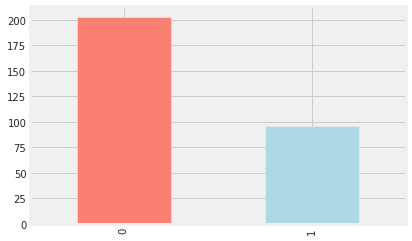

In [4]:
df.DEATH_EVENT.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [5]:
# Checking for messing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anaemia : [0 1]
creatinine_phosphokinase : [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334

In [7]:
categorical_val

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

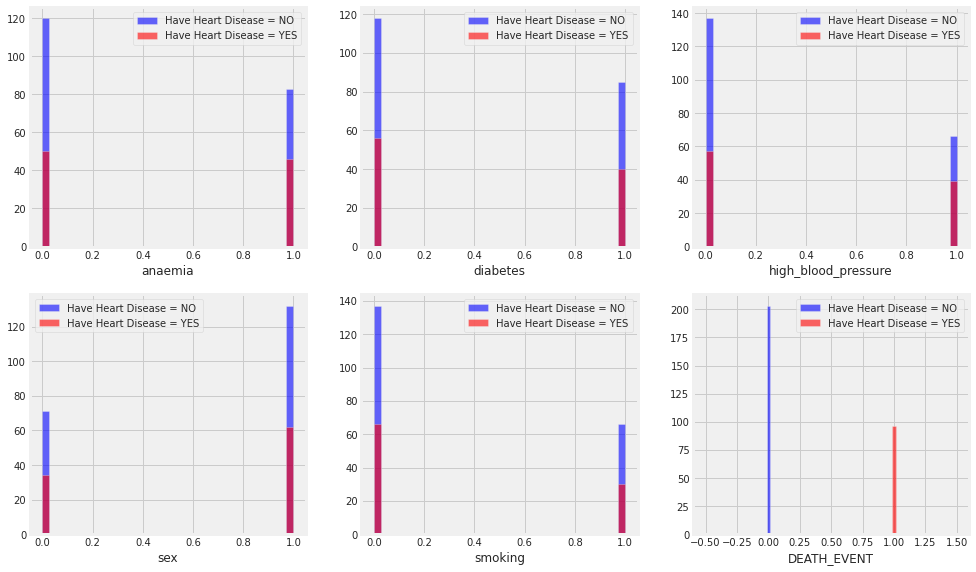

In [9]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["DEATH_EVENT"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["DEATH_EVENT"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

ValueError: ignored

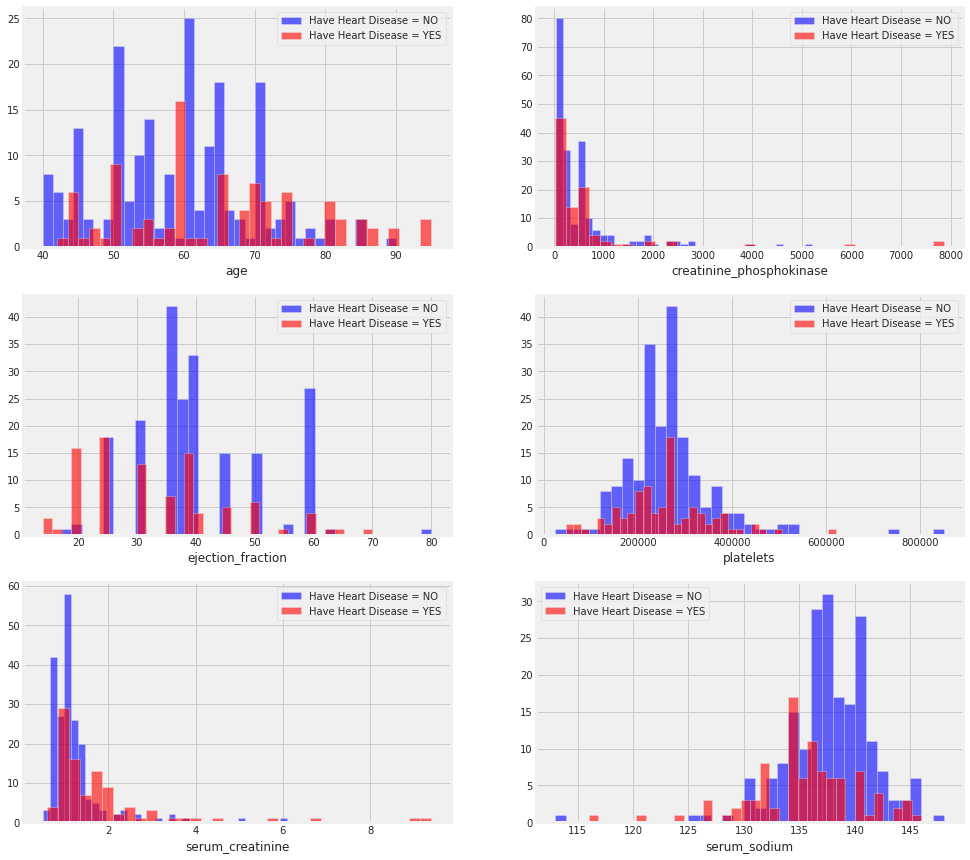

In [10]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["DEATH_EVENT"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["DEATH_EVENT"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

(13.5, -0.5)

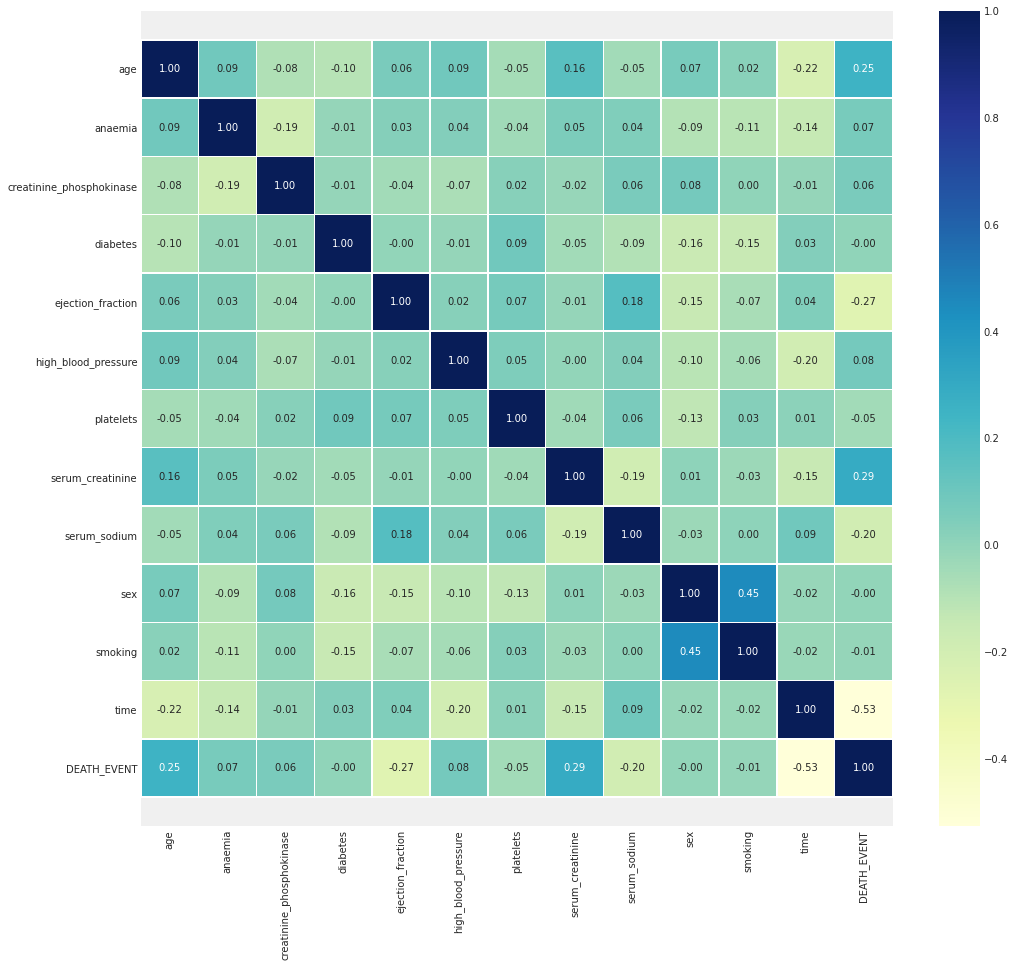

In [11]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

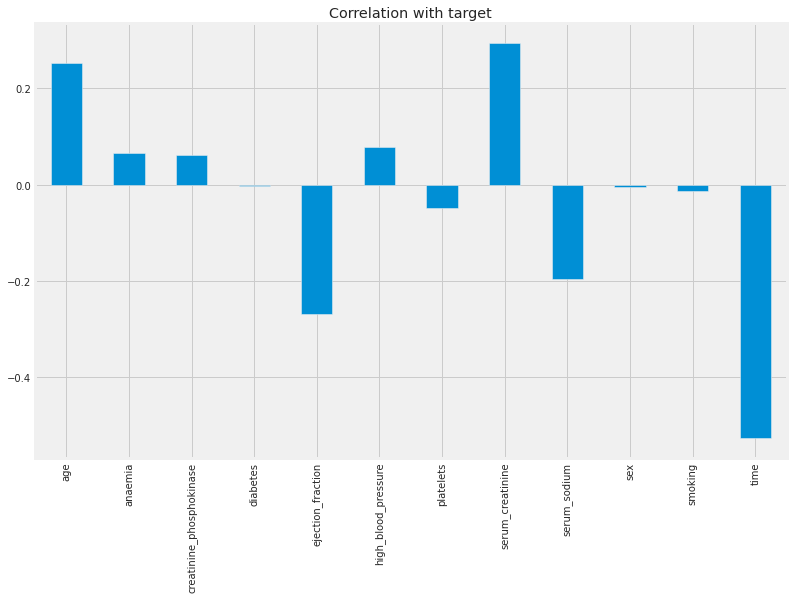

In [13]:
df.drop('DEATH_EVENT', axis=1).corrwith(df.DEATH_EVENT).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [14]:
categorical_val.remove('DEATH_EVENT')
dataset = pd.get_dummies(df, columns = categorical_val)

In [15]:
dataset.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,1,0,1,0,0,1,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,1,0,1,0,1,0,0,1,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,1,0,1,0,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,7,1,0,1,1,0,1,0,0,1,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,0,1,0,1,1,0,1,0,1,0


In [16]:
print(df.columns)
print(dataset.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT', 'anaemia_0',
       'anaemia_1', 'diabetes_0', 'diabetes_1', 'high_blood_pressure_0',
       'high_blood_pressure_1', 'sex_0', 'sex_1', 'smoking_0', 'smoking_1'],
      dtype='object')


In [19]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [23]:
from sklearn.model_selection import train_test_split

X = dataset.drop('DEATH_EVENT', axis=1)
y = dataset.DEATH_EVENT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891720   0.807692  0.870813    0.849706      0.867999
recall       0.933333   0.711864  0.870813    0.822599      0.870813
f1-score     0.912052   0.756757  0.870813    0.834404      0.868213
support    150.000000  59.000000  0.870813  209.000000    209.000000
_______________________________________________
Confusion Matrix: 
 [[140  10]
 [ 17  42]]

Test Result:
Accuracy Score: 78.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.765625   0.846154  0.788889   0.805889      0.798731
recall      0.924528   0.594595  0.788889   0.759561      0.788889
f1-score    0.837607   0.698413  0.788889   0.768010      0.780383
support    53.000000  37.000000  0.788889  90.000000     90.000000
_____________

In [25]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.08134,78.888889


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.56%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887500   0.836735  0.875598    0.862117      0.873169
recall       0.946667   0.694915  0.875598    0.820791      0.875598
f1-score     0.916129   0.759259  0.875598    0.837694      0.871845
support    150.000000  59.000000  0.875598  209.000000    209.000000
_______________________________________________
Confusion Matrix: 
 [[142   8]
 [ 18  41]]

Test Result:
Accuracy Score: 75.56%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.724638   0.857143  0.755556   0.790890      0.779112
recall      0.943396   0.486486  0.755556   0.714941      0.755556
f1-score    0.819672   0.620690  0.755556   0.720181      0.737868
support    53.000000  37.000000  0.755556  90.000000     90.000000
_____________

In [27]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.081340,78.888889
1,K-nearest neighbors,87.559809,75.555556


In [28]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.04%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.986842   1.000000  0.990431    0.993421      0.990557
recall       1.000000   0.966102  0.990431    0.983051      0.990431
f1-score     0.993377   0.982759  0.990431    0.988068      0.990380
support    150.000000  59.000000  0.990431  209.000000    209.000000
_______________________________________________
Confusion Matrix: 
 [[150   0]
 [  2  57]]

Test Result:
Accuracy Score: 62.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.609195   1.000000  0.622222   0.804598      0.769860
recall      1.000000   0.081081  0.622222   0.540541      0.622222
f1-score    0.757143   0.150000  0.622222   0.453571      0.507540
support    53.000000  37.000000  0.622222  90.000000     90.000000
_____________

In [29]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.081340,78.888889
1,K-nearest neighbors,87.559809,75.555556
2,Support Vector Machine,99.043062,62.222222


In [30]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    150.0  59.0       1.0      209.0         209.0
_______________________________________________
Confusion Matrix: 
 [[150   0]
 [  0  59]]

Test Result:
Accuracy Score: 66.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.676923   0.640000  0.666667   0.658462      0.661744
recall      0.830189   0.432432  0.666667   0.631311      0.666667
f1-score    0.745763   0.516129  0.666667   0.630946      0.651358
support    53.000000  37.000000  0.666667  90.000000     90.000000
_______________________________________________
Confusion Matrix: 


In [31]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.081340,78.888889
1,K-nearest neighbors,87.559809,75.555556
2,Support Vector Machine,99.043062,62.222222
3,Decision Tree Classifier,100.000000,66.666667


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    150.0  59.0       1.0      209.0         209.0
_______________________________________________
Confusion Matrix: 
 [[150   0]
 [  0  59]]

Test Result:
Accuracy Score: 76.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.742424   0.833333  0.766667   0.787879      0.779798
recall      0.924528   0.540541  0.766667   0.732534      0.766667
f1-score    0.823529   0.655738  0.766667   0.739634      0.754548
support    53.000000  37.000000  0.766667  90.000000     90.000000
_______________________________________________
Confusion Matrix: 


In [33]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.081340,78.888889
1,K-nearest neighbors,87.559809,75.555556
2,Support Vector Machine,99.043062,62.222222
3,Decision Tree Classifier,100.000000,66.666667
4,Random Forest Classifier,100.000000,76.666667
